In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#Lệnh này được sử dụng để kết nối Google Drive với Google Colab notebook

Mounted at /content/drive


In [ ]:
!pip install opencv-python #Tải thư viện opencv

In [ ]:
!pip install tensorflow #Tải thư viện tensorflow

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # sử dụng thư viện keras trong tensorflow để tải bộ dữ liệu mnist

# Sau khi tải bộ dữ liệu MNIST, chia thành hai tập dữ liệu huấn luyện và kiểm tra

In [ ]:
#giải nén tập dữ liệu thành tập dữ liệu đào tạo và thử nghiệm
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#Đây là đoạn code sử dụng để tải bộ dữ liệu chữ số viết tay MNIST (Modified National Institute of Standards and Technology database) trong Machine Learning.

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape #nó sẽ trả về kích thước (shape) của mảng numpy x_train.

(60000, 28, 28)

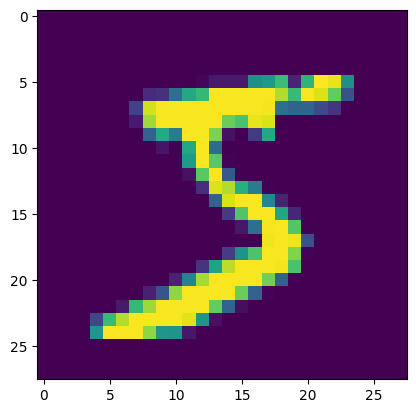

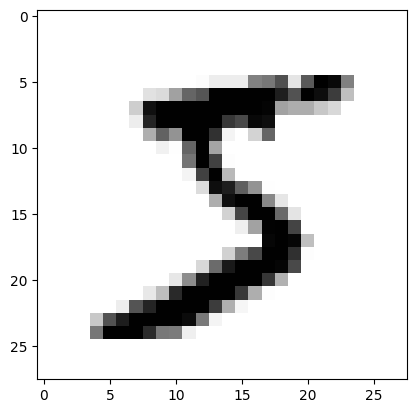

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)
#Đoạn code này sử dụng thư viện matplotlib để hiển thị ảnh chữ số viết tay đầu tiên trong tập huấn luyện của bộ dữ liệu MNIST.

# Kiểm tra giá trị của từng pixel trước khi chuẩn hóa

In [ ]:
print(x_train[0]) #Hiển thị ma trận 2 chiều tương ứng với ảnh chữ số viết tay đầu tiên trong tập huấn luyện của bộ dữ liệu MNIST.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

# Chuẩn hóa dữ liệu

5


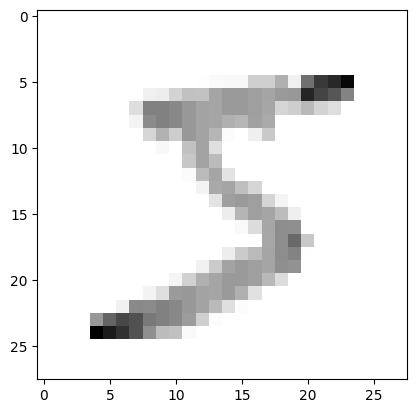

In [ ]:
#thực hiện chuẩn hóa dữ liệu
x_train = tf.keras.utils.normalize(x_train, axis =1 )  #axis = 1 : chuẩn hóa được thực hiện trên mỗi hàng của ma trận dữ liệu
x_test = tf.keras.utils.normalize(x_test, axis =1 )
plt.imshow(x_train[0], cmap = plt.cm.binary)
print(y_train[0])

# Sau khi chuẩn hóa

In [ ]:
print(x_train[0]) #Ma trận chữ viết sau khi chuẩn hóa

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])

5


# Thay đổi kích thước hình ảnh để phù tính tích chập

In [ ]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print('Training samples dimension', x_trainr.shape)
print('Testing samples dimension', x_testr.shape)
#Giá trị -1 cho biết kích thước của chiều đó sẽ được tính tự động dựa trên kích thước của các chiều còn lại và tổng số phần tử trong mảng
#Giá trị 1  cho biết rằng dữ liệu là ảnh xám (grayscale) với một kênh màu duy nhất

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


# Tạo ra một mạng nơ-ron để huấn luyện

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [ ]:
# Tạo 1 mạng nơron
model = Sequential()

#Xây dựng các lớp trong mô hình và cấu hình các tham số để tạo ra một mạng nơ-ron hoàn chỉnh

#Lớp tích chập đầu tiền 0 1 2 3 (60000,28,28,1)  28-3+1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) #số lượng bộ lọc:64, kích thước 3x3, kích thước đầu vào của lớp tích chập
model.add(Activation('relu')) # Chức năng kích hoạt để làm cho nó phi tuyến tính, đầu ra của hàm bằng giá trị đầu vào đếu đầu vào > 0, bằng 0 nếu đầu vào < = 0
model.add(MaxPooling2D(pool_size = (2,2))) #Maxpooling single maximum value of 2x2

#Lớp tích chập thứ 2   26-3+1 = 24x24
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Lớp tích chập thứ 3   24x24
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#lớp kết nối đầy đủ # 1 20x20=400
model.add(Flatten()) #trước khi sử dụng lớp được kết nối đầy đủ, cần phải làm phẳng
model.add(Dense(64))
model.add(Activation('relu'))

#lớp kết nối đầy đủ # 2
model.add(Dense(32))
model.add(Activation('relu'))

#lớp được kết nối đầy đủ cuối cùng, đầu ra phải bằng số lớp, 10 (0-9)
model.add(Dense(10)) #lớp dày đặc cuối cùng này phải bằng 10
model.add(Activation('softmax')) #chức năng kích hoạt được thay đổi thành softmax ( xác suất lớp)

In [ ]:
model.summary() #Hiển thị tóm tắt mô hình mạng nơ ron

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
print('Total training samples: ', len(x_trainr)) #Hiển thị tổng số mẫu huấn luyện

Total training samples:  60000


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #Cấu hình mô hình mạng neural trước khi bắt đầu quá trình huấn luyện.

In [ ]:
history = model.fit(x_trainr, y_train, epochs= 5, validation_split= 0.3) # Training model

Epoch 1/5
1313/1313 [==============================] - 84s 63ms/step - loss: 0.3380 - accuracy: 0.8934 - val_loss: 0.1425 - val_accuracy: 0.9572
Epoch 2/5
1313/1313 [==============================] - 83s 63ms/step - loss: 0.1125 - accuracy: 0.9654 - val_loss: 0.0861 - val_accuracy: 0.9721
Epoch 3/5
1313/1313 [==============================] - 81s 62ms/step - loss: 0.0781 - accuracy: 0.9759 - val_loss: 0.0780 - val_accuracy: 0.9764
Epoch 4/5
1313/1313 [==============================] - 79s 60ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0740 - val_accuracy: 0.9774
Epoch 5/5
1313/1313 [==============================] - 81s 62ms/step - loss: 0.0500 - accuracy: 0.9840 - val_loss: 0.0657 - val_accuracy: 0.9798


In [ ]:
#đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm tra x_testr và nhãn y_test
test_loss, test_acc = model.evaluate(x_testr, y_test) # test_loss: chứa giá trị hàm mất mát, test_acc: chứa giá trị độ chính xác
print('test loss on 10000 test samples', test_loss)
print('validation accuracy on 10000 test samples', test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.0597 - accuracy: 0.9834
test loss on 10000 test samples 0.05971034988760948
validation accuracy on 10000 test samples 0.9833999872207642


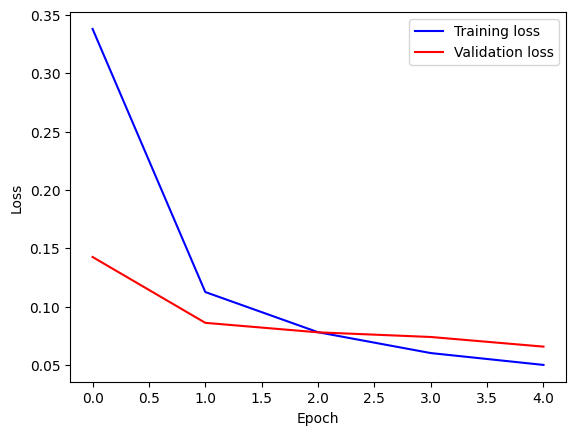

In [ ]:
#Vẽ đồ thị biểu diễn quá trình huấn luyện
plt.plot(history.history['loss'], label='Training loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend() # hiển thị chú thích cho đồ thị

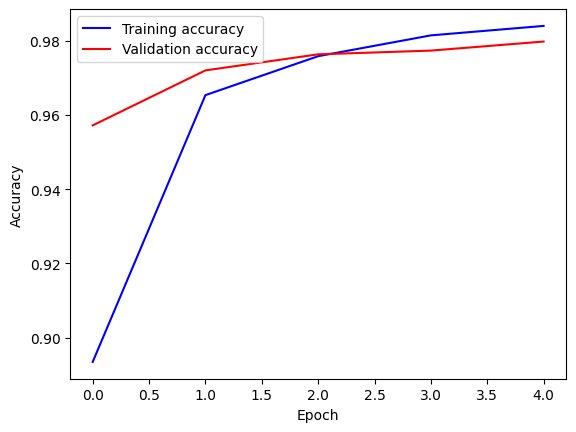

In [ ]:
#Vẽ đồ thị biểu diễn độ chính xác của mô hình trên tập huấn luyện và tập validation ở mỗi epoch
plt.plot(history.history['accuracy'], label='Training accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend() # hiển thị chú thích cho đồ thị

In [ ]:
predictions = model.predict([x_testr]) #Dự đoán nhãn của các mẫu trong tập dữ liệu kiểm thử

313/313 [==============================] - 4s 13ms/step


In [ ]:
print(predictions) #In ra ma trận dự đoán của mô hình cho tập dữ liệu kiểm thử

[[8.3105867e-08 1.7173776e-06 2.8823490e-06 ... 9.9998432e-01
  2.2354163e-08 3.3433791e-06]
 [1.6815704e-05 3.6085219e-06 9.9983501e-01 ... 1.4399235e-05
  3.8398619e-05 3.2947231e-05]
 [1.7633171e-07 9.9999386e-01 1.6990403e-07 ... 2.6068389e-07
  1.5105229e-06 4.4194582e-07]
 ...
 [4.9826787e-10 5.2273252e-09 4.8259730e-09 ... 4.3304833e-08
  1.8334367e-07 1.1972327e-06]
 [5.2476596e-05 1.3741148e-07 1.0385302e-08 ... 1.0434509e-07
  9.0864678e-06 1.2961027e-05]
 [2.5023899e-05 3.1618663e-07 1.0451403e-06 ... 1.1757873e-07
  3.9490515e-05 1.1734545e-06]]


In [ ]:
print(np.argmax(predictions[0])) # in ra chỉ số của lớp có xác suất cao nhất đối với mẫu đầu tiên trong tập dữ liệu kiểm thử.

7


7


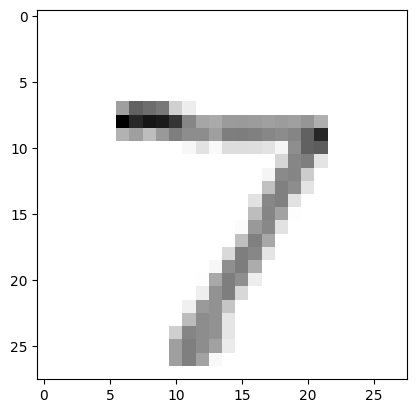

In [ ]:
plt.imshow(x_test[0], cmap = plt.cm.binary)
print(y_test[0])

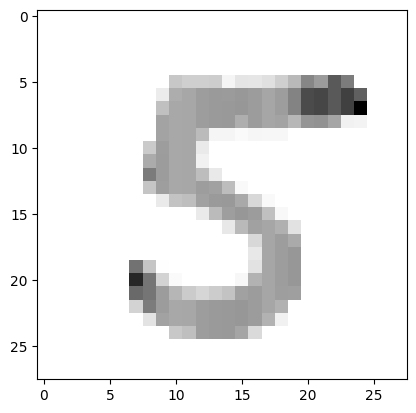

In [ ]:
plt.imshow(x_test[162], cmap = plt.cm.binary)

# Test

In [ ]:
import os #cho phép thao tác với các chức năng của hệ điều hành.
os.chdir("/content") #thay đổi thư mục làm việc hiện tại đến thư mục "/content".
!ls #hiển thị danh sách các tập tin và thư mục trong thư mục hiện tại.

drive  sample_data


(-0.5, 255.5, 255.5, -0.5)

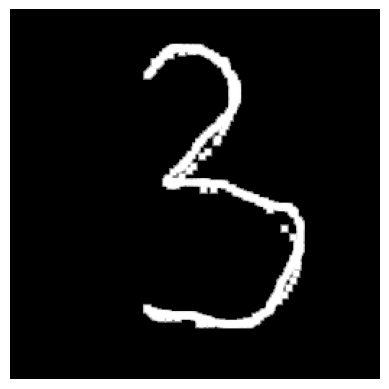

In [ ]:
import cv2
img = cv2.imread('my_drawing.png')
plt.imshow(img[:,:,::-1])
plt.axis('off')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
newing = tf.keras.utils.normalize (resized, axis = 1)
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#newing.shape

In [ ]:
predictions = model.predict(newing)
print(np.argmax(predictions))

1/1 [==============================] - 0s 33ms/step
3


# Drawing app

In [ ]:
#@title <font color='red'>Drawing APP</font> {vertical-output: true, run: "auto"}

import ipywidgets as widgets
from ipywidgets import Layout, Button, Box
from IPython.display import display, HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

Square_Size = 256 #@param ["256", "512"] {type:"raw"}
Brush_Size = 5 #@param {type:"slider", min:0, max:30, step:5}
filename = "my_drawing"#@param [] {allow-input: true}
filename =filename + ".png"

js_code = '''
<style>
  .colors-buttons div {
      width: 30px;
      height: 30px;
      margin: 2px;
      border: 1px solid black !important;}
  div {
      display: flex;
  }
  canvas{border:1px solid black !important;}
</style>
<canvas id="myCanvas" width="%d" height="%d"></canvas>
<div class="colors-buttons">
    <div class="color" style="background-color: #000000;" id-color="#000000"></div>
  <div class="color" style="background-color: #FFFFFF;" id-color="#FFFFFF"></div>
  <div class="color" style="background-color: #FF0000;" id-color="#FF0000"></div>
  <div class="color" style="background-color: #00FF00;" id-color="#00FF00"></div>
  <div class="color" style="background-color: #0000FF;" id-color="#0000FF"></div>
</div>
<script>
  var canvas = document.querySelector('canvas')
  var ctx = canvas.getContext('2d')
  ctx.fillStyle = 'black';
  ctx.fillRect( 0, 0, canvas.width, canvas.height)
  ctx.fillStyle = 'white';
  var Brush_Size = %d
  var button = document.querySelector('button')
  var mouse = {x: 0, y: 0}
  canvas.addEventListener('mousemove', function(e) {
    mouse.x = e.pageX - this.offsetLeft
    mouse.y = e.pageY - this.offsetTop
  })
  canvas.onmousedown = ()=>{
    ctx.beginPath()
    ctx.moveTo(mouse.x, mouse.y)

    canvas.addEventListener('mousemove', onPaint)
  }
  canvas.onmouseup = ()=>{
    canvas.removeEventListener('mousemove', onPaint)
  }
  var onPaint = ()=>{
    ctx.fillRect(mouse.x-( Brush_Size/2), mouse.y-(Brush_Size/2), Brush_Size, Brush_Size)
    ctx.stroke()
  }
  const colors = document.getElementsByClassName('color');
  Array.from(colors).forEach(color => {
      color.addEventListener('click', (event) => {
          const colorSelected = event.target.getAttribute('id-color');
          ctx.fillStyle = colorSelected;
      });
  });
    // FINISH BUTTON
  var data = new Promise(resolve=>{
    button.onclick = ()=>{
      resolve(canvas.toDataURL('image/jpg'))
    }
  })
</script>
'''


## Function to Appear Image Canvas
def draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size):
  display(HTML(js_code % (w, h, Brush_Size)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  if AttributeError:
    pass
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)
  if button2.on_click(on_button_clicked2):
    pass


## Action for Reset Button
def on_button_clicked(b):
  with output:
    #display(HTML(canvas_html % ( w=$Square_Size, h=$Square_Size, Brush_Size=$Brush_Size)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
      f.write(binary)
  return len(binary)


## Show Save Button & Save outputs
button = widgets.Button(description="Save")
button.on_click(on_button_clicked)
output = widgets.Output()
display(button, output)

## Action for Delete Button
def on_delete_button_clicked(b):
  display(HTML("<script>ctx.fillStyle = 'black'; ctx.fillRect(0, 0, canvas.width, canvas.height);</script>"))

## Show Delete Button
delete_button = widgets.Button(description="Delete")
delete_button.on_click(on_delete_button_clicked)
display(delete_button)

## Show Canvas for the First Time
draw(filename=filename,  w=Square_Size, h=Square_Size, Brush_Size=Brush_Size)
#print("Image Saved at")

Button(description='Save', style=ButtonStyle())

Output()

Button(description='Delete', style=ButtonStyle())

4976